<a href="https://colab.research.google.com/github/RodrigoTito/Teste-de-Python/blob/main/Teste_de_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste de Python

* Importando bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing  import  StandardScaler

* Importando a base de dados

In [4]:
df   = pd.read_csv("/content/base_1ah.csv" )

### Visão inicial do dataset 



* Tamanho do dataset

In [5]:
df.shape

(1460, 81)

* Variáveis do dataset

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

* Tipo das variáveis

In [7]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

* Visualizando o dataset 

In [8]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* Resumo de cada variável do dataset

In [9]:
df_aux = pd.DataFrame({'Type': df.dtypes,
                      'Missing': df.isna().sum(),
                      'Size': df.shape[0],
                       'Unique': df.nunique()
                     })
df_aux['Missing_%']= df_aux.Missing/df_aux.Size * 100
df_aux.sort_values(by='Missing_%', ascending=False)

,Type,Missing,Size,Unique,Missing_%
PoolQC,object,1453,1460,3,99.520548
MiscFeature,object,1406,1460,4,96.301370
Alley,object,1369,1460,2,93.767123
Fence,object,1179,1460,4,80.753425
FireplaceQu,object,690,1460,5,47.260274
...,...,...,...,...,...
ExterQual,object,0,1460,4,0.000000
Exterior2nd,object,0,1460,16,0.000000
Exterior1st,object,0,1460,15,0.000000
RoofMatl,object,0,1460,8,0.000000


* Variáveis com valores ausentes acima de 40%

In [10]:
df_aux[df_aux['Missing_%']>40]['Missing_%'].sort_values(ascending=False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
Name: Missing_%, dtype: float64

Cada variável: **PoolQC,** **MiscFeature,**  **Alley,** **Fence** e **FireplaceQu,** possue uma considerável taxa de valores ausentes. 

* Eliminando variáveis irrelevantes

In [11]:
to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu']
df.drop(to_drop, axis = 1, inplace = True)
to_drop = ['Id','LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
           'RoofMatl','Exterior1st','Exterior2nd','LotFrontage','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
           'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF', 'Heating', 'HeatingQC',
           'Electrical','KitchenQual','Functional','GarageType','GarageFinish', 'GarageQual','GarageCond','GarageYrBlt','PavedDrive',
           'SaleType','SaleCondition']
df.drop(to_drop, axis = 1, inplace = True)


In [12]:
df.shape

(1460, 37)

Reduzimos para 37 Variáveis no dataset

In [13]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
df_aux1 = pd.DataFrame({'Type': df.dtypes,
                      'Missing': df.isna().sum(),
                      'Size': df.shape[0],
                       'Unique': df.nunique()
                     })
df_aux1['Missing_%']= df_aux1.Missing/df_aux.Size * 100
df_aux1.sort_values(by='Missing_%', ascending=False)

,Type,Missing,Size,Unique,Missing_%
MasVnrArea,float64,8,1460,327,0.547945
MSSubClass,int64,0,1460,15,0.000000
BedroomAbvGr,int64,0,1460,8,0.000000
KitchenAbvGr,int64,0,1460,4,0.000000
TotRmsAbvGrd,int64,0,1460,12,0.000000
Fireplaces,int64,0,1460,4,0.000000
GarageCars,int64,0,1460,5,0.000000
GarageArea,int64,0,1460,441,0.000000
WoodDeckSF,int64,0,1460,274,0.000000
OpenPorchSF,int64,0,1460,202,0.000000


* Variáveis numéricas 

In [15]:
var_numerica = df.drop(['MSZoning','Street','LotShape','Neighborhood','CentralAir'], axis=1).columns
var_numerica

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# 1 - Análise descritiva de variáveis

### 1.1 Estatísticas descritivas: 

In [16]:
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 1.2 Gráficos 

### Gráficos de colunas

In [17]:
def grafico_com_porcetagem(df,feature):
    total = len(df)
    ax =  sns.countplot(x=feature,data=df,color = "#2b8cbe")
    ax.set_ylim(0,total*1.1) # Ajusta altura do frame
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (x, y+10), ha='center')
    return ax
def grafico_com_porcetagem_1(g):
    g.ax.set_ylim(0,100)
    for p in g.ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        g.ax.annotate('{:.2f}%'.format(p.get_height()), (x, y+2), ha='center')
    return g

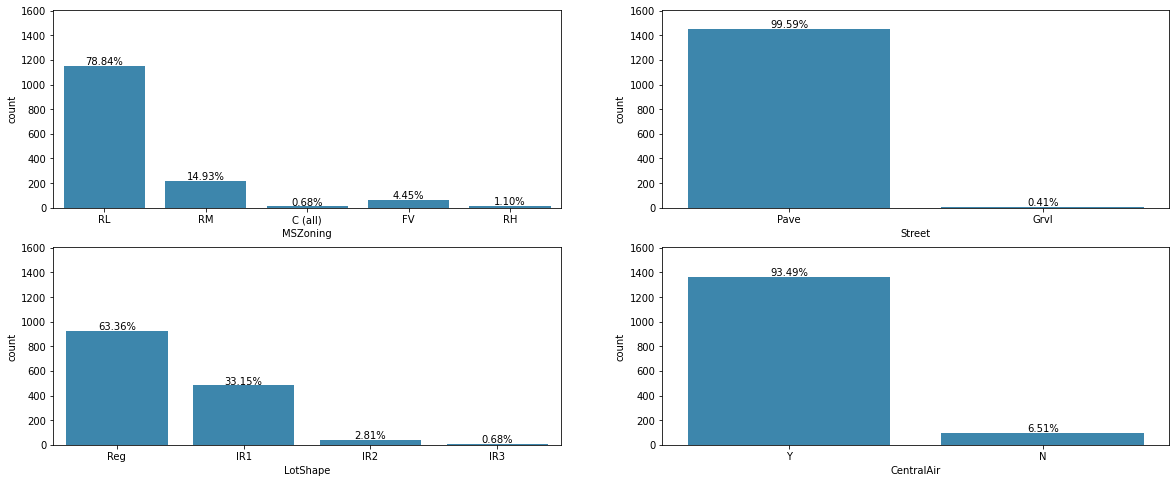

In [18]:
plt.figure(figsize=(20,8))
plt.subplot(221),grafico_com_porcetagem(df[['MSZoning']],'MSZoning')
plt.subplot(222),grafico_com_porcetagem(df[['Street']],'Street')
plt.subplot(223),grafico_com_porcetagem(df[['LotShape']],'LotShape')
plt.subplot(224),grafico_com_porcetagem(df[['CentralAir']],'CentralAir')
plt.show()

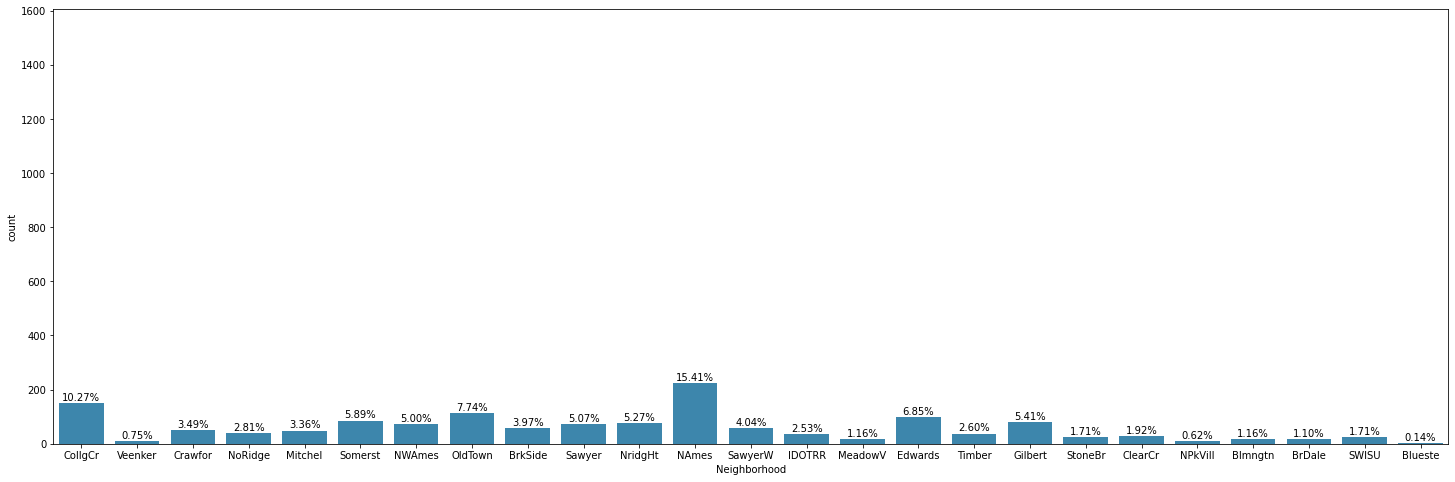

In [19]:
plt.figure(figsize=(25,8))
grafico_com_porcetagem(df[['Neighborhood']],'Neighborhood')
plt.show()

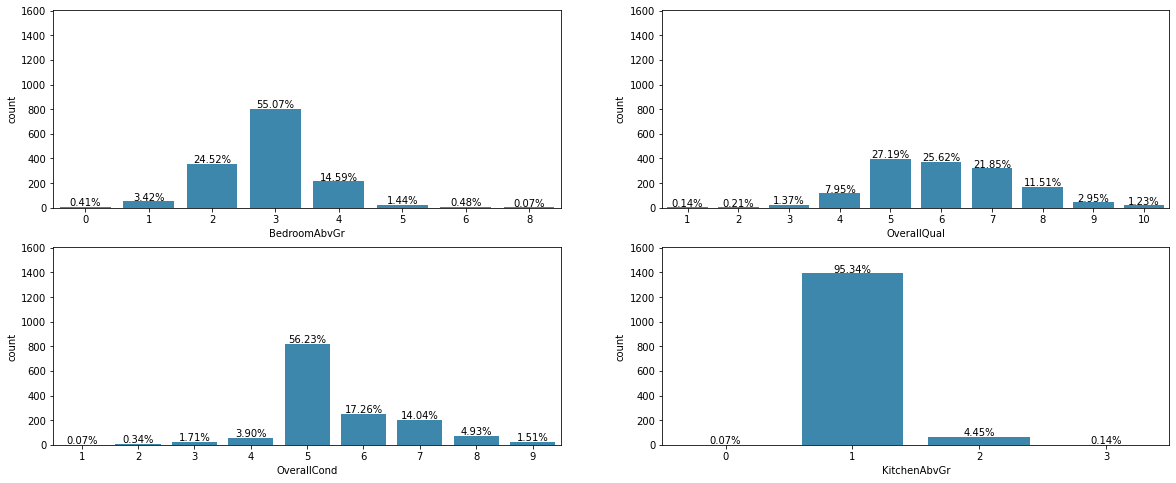

In [20]:
plt.figure(figsize=(20,8))
plt.subplot(221),grafico_com_porcetagem(df[['BedroomAbvGr']],'BedroomAbvGr')
plt.subplot(222),grafico_com_porcetagem(df[['OverallQual']],'OverallQual')
plt.subplot(223),grafico_com_porcetagem(df[['OverallCond']],'OverallCond')
plt.subplot(224),grafico_com_porcetagem(df[['KitchenAbvGr']],'KitchenAbvGr')
plt.show()

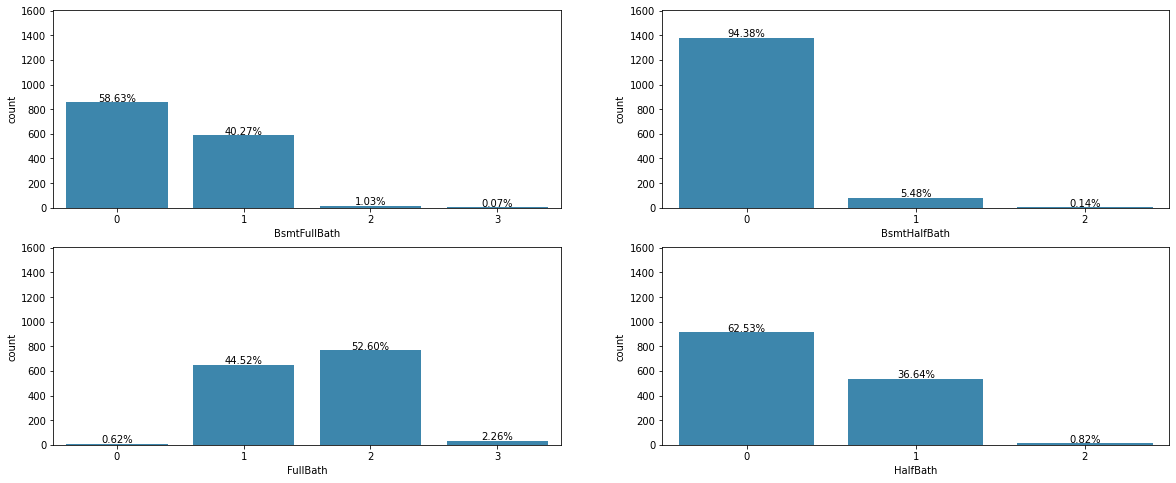

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(221),grafico_com_porcetagem(df[['BsmtFullBath']],'BsmtFullBath')
plt.subplot(222),grafico_com_porcetagem(df[['BsmtHalfBath']],'BsmtHalfBath')
plt.subplot(223),grafico_com_porcetagem(df[['FullBath']],'FullBath')
plt.subplot(224),grafico_com_porcetagem(df[['HalfBath']],'HalfBath')
plt.show()

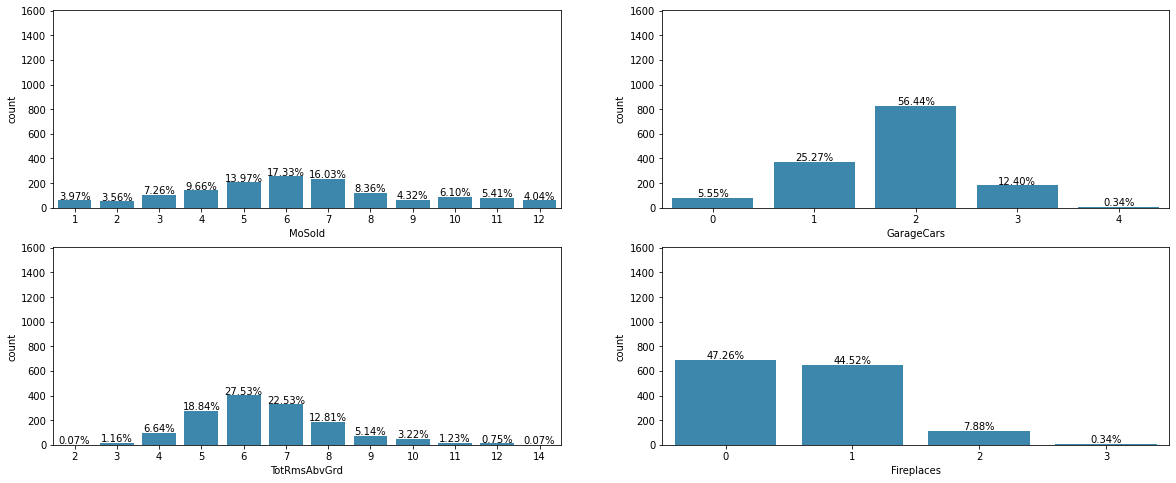

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(221),grafico_com_porcetagem(df[['MoSold']],'MoSold')
plt.subplot(222),grafico_com_porcetagem(df[['GarageCars']],'GarageCars')
plt.subplot(223),grafico_com_porcetagem(df[['TotRmsAbvGrd']],'TotRmsAbvGrd')
plt.subplot(224),grafico_com_porcetagem(df[['Fireplaces']],'Fireplaces')
plt.show()

### Gráficos de boxplot 

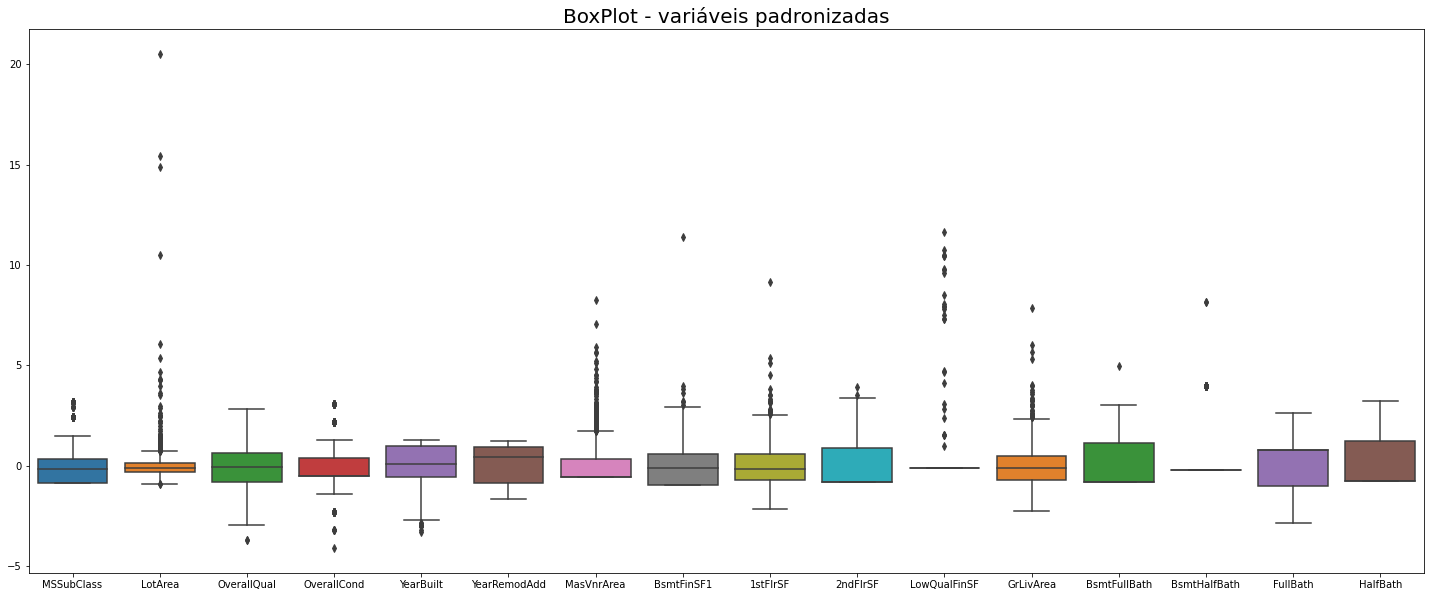

In [23]:
scaler = StandardScaler()
df_var_numerica = pd.DataFrame(scaler.fit_transform(df[var_numerica]),columns=var_numerica) 
plt.figure(figsize=(25,10))
sns.boxplot(data=df_var_numerica.iloc[:,:int(len(var_numerica)/2)],palette="tab10")
plt.title('BoxPlot - variáveis ​​padronizadas',fontsize=20)
plt.show()

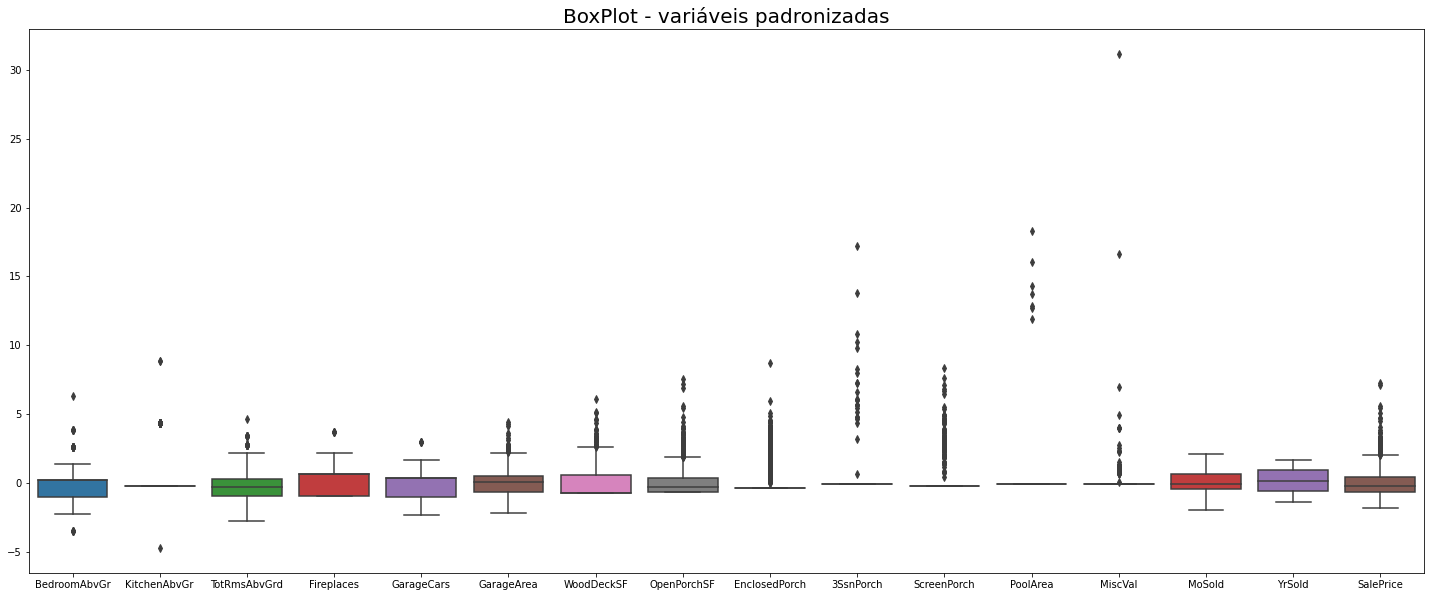

In [24]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df_var_numerica.iloc[:,int(len(var_numerica)/2):],palette="tab10")
plt.title('BoxPlot - variáveis ​​padronizadas',fontsize=20);
plt.show()

### Gráficos de dispersão

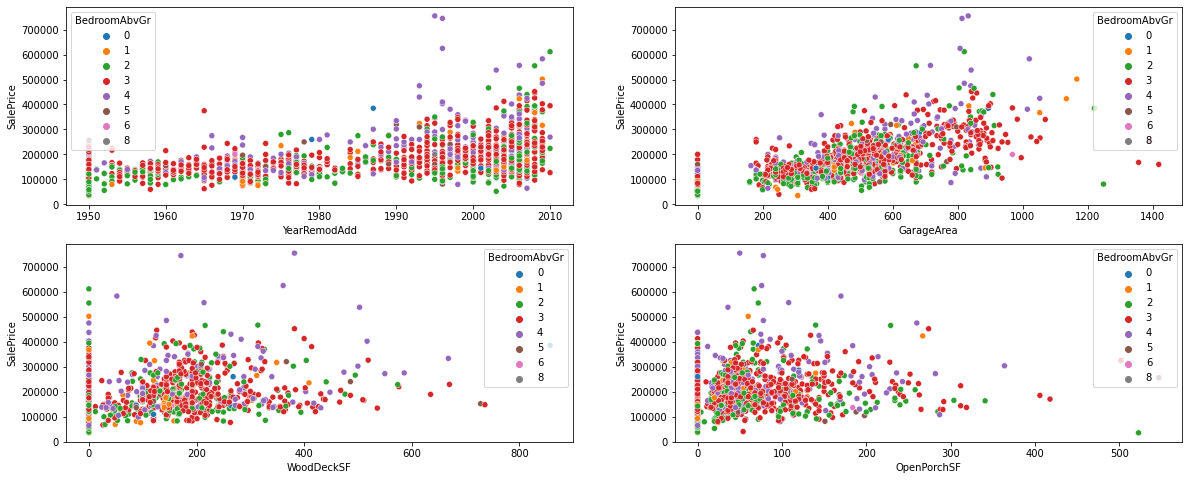

In [25]:
plt.figure(figsize=(20,8))
plt.subplot(221),sns.scatterplot(x='YearRemodAdd',y='SalePrice',hue='BedroomAbvGr',data=df,palette="tab10")
plt.subplot(222),sns.scatterplot(x='GarageArea',y='SalePrice',hue='BedroomAbvGr',data=df,palette="tab10")
plt.subplot(223),sns.scatterplot(x='WoodDeckSF',y='SalePrice',hue='BedroomAbvGr',data=df,palette="tab10")
plt.subplot(224),sns.scatterplot(x='OpenPorchSF',y='SalePrice',hue='BedroomAbvGr',data=df,palette="tab10")
plt.show()

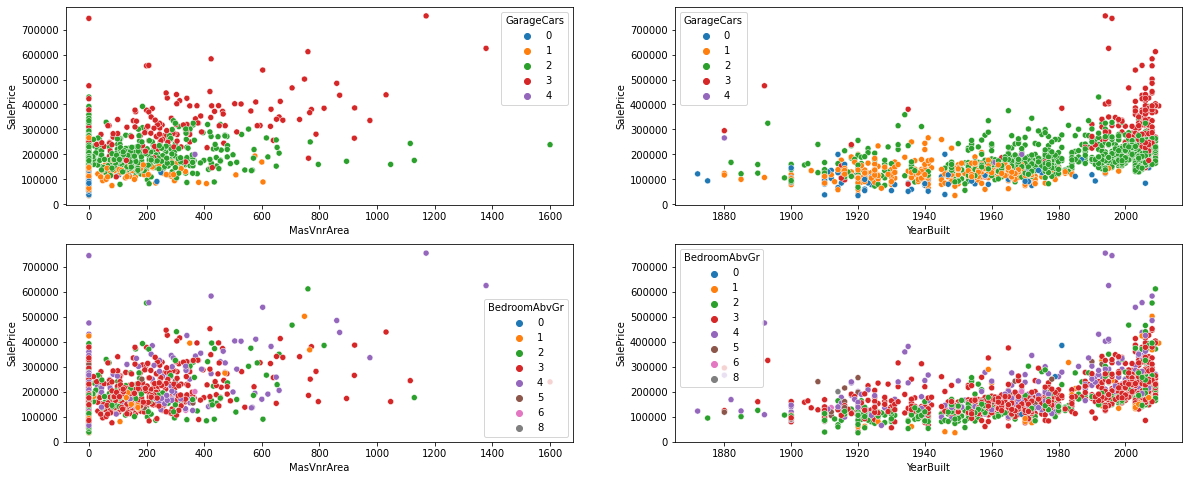

In [26]:
plt.figure(figsize=(20,8))
plt.subplot(221),sns.scatterplot(x='MasVnrArea',y='SalePrice',hue='GarageCars',data=df,palette="tab10")
plt.subplot(222),sns.scatterplot(x='YearBuilt',y='SalePrice',hue='GarageCars',data=df,palette="tab10")
plt.subplot(223),sns.scatterplot(x='MasVnrArea',y='SalePrice',hue='BedroomAbvGr',data=df,palette="tab10")
plt.subplot(224),sns.scatterplot(x='YearBuilt',y='SalePrice',hue='BedroomAbvGr',data=df,palette="tab10")
plt.show()

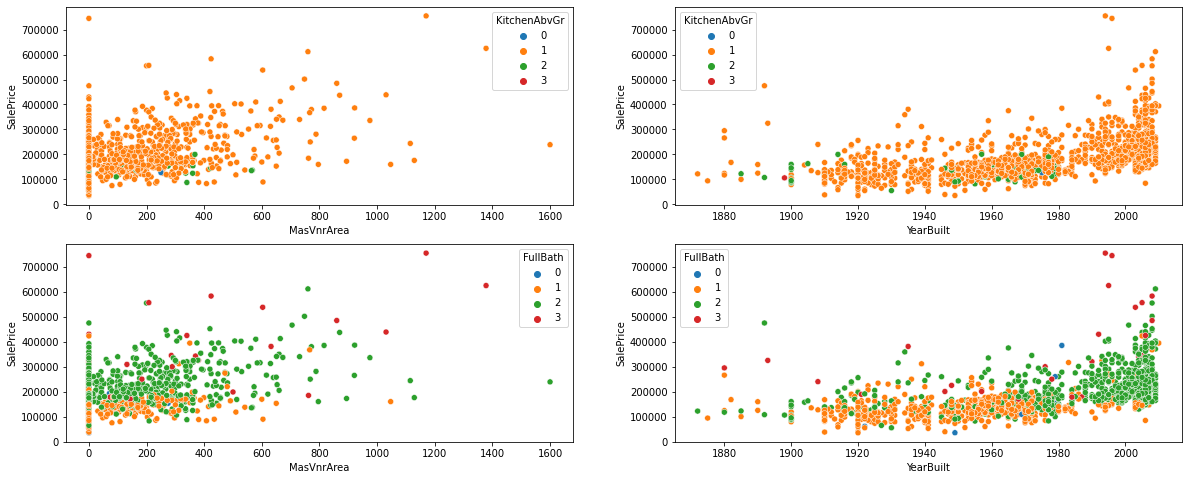

In [27]:
plt.figure(figsize=(20,8))
plt.subplot(221),sns.scatterplot(x='MasVnrArea',y='SalePrice',hue='KitchenAbvGr',data=df,palette="tab10")
plt.subplot(222),sns.scatterplot(x='YearBuilt',y='SalePrice',hue='KitchenAbvGr',data=df,palette="tab10")
plt.subplot(223),sns.scatterplot(x='MasVnrArea',y='SalePrice',hue='FullBath',data=df,palette="tab10")
plt.subplot(224),sns.scatterplot(x='YearBuilt',y='SalePrice',hue='FullBath',data=df,palette="tab10")
plt.show()

# 2 - Análise de correlações

## 2.1 Correlograma

* Verificando o correlograma  de algumas variáveis do dataset

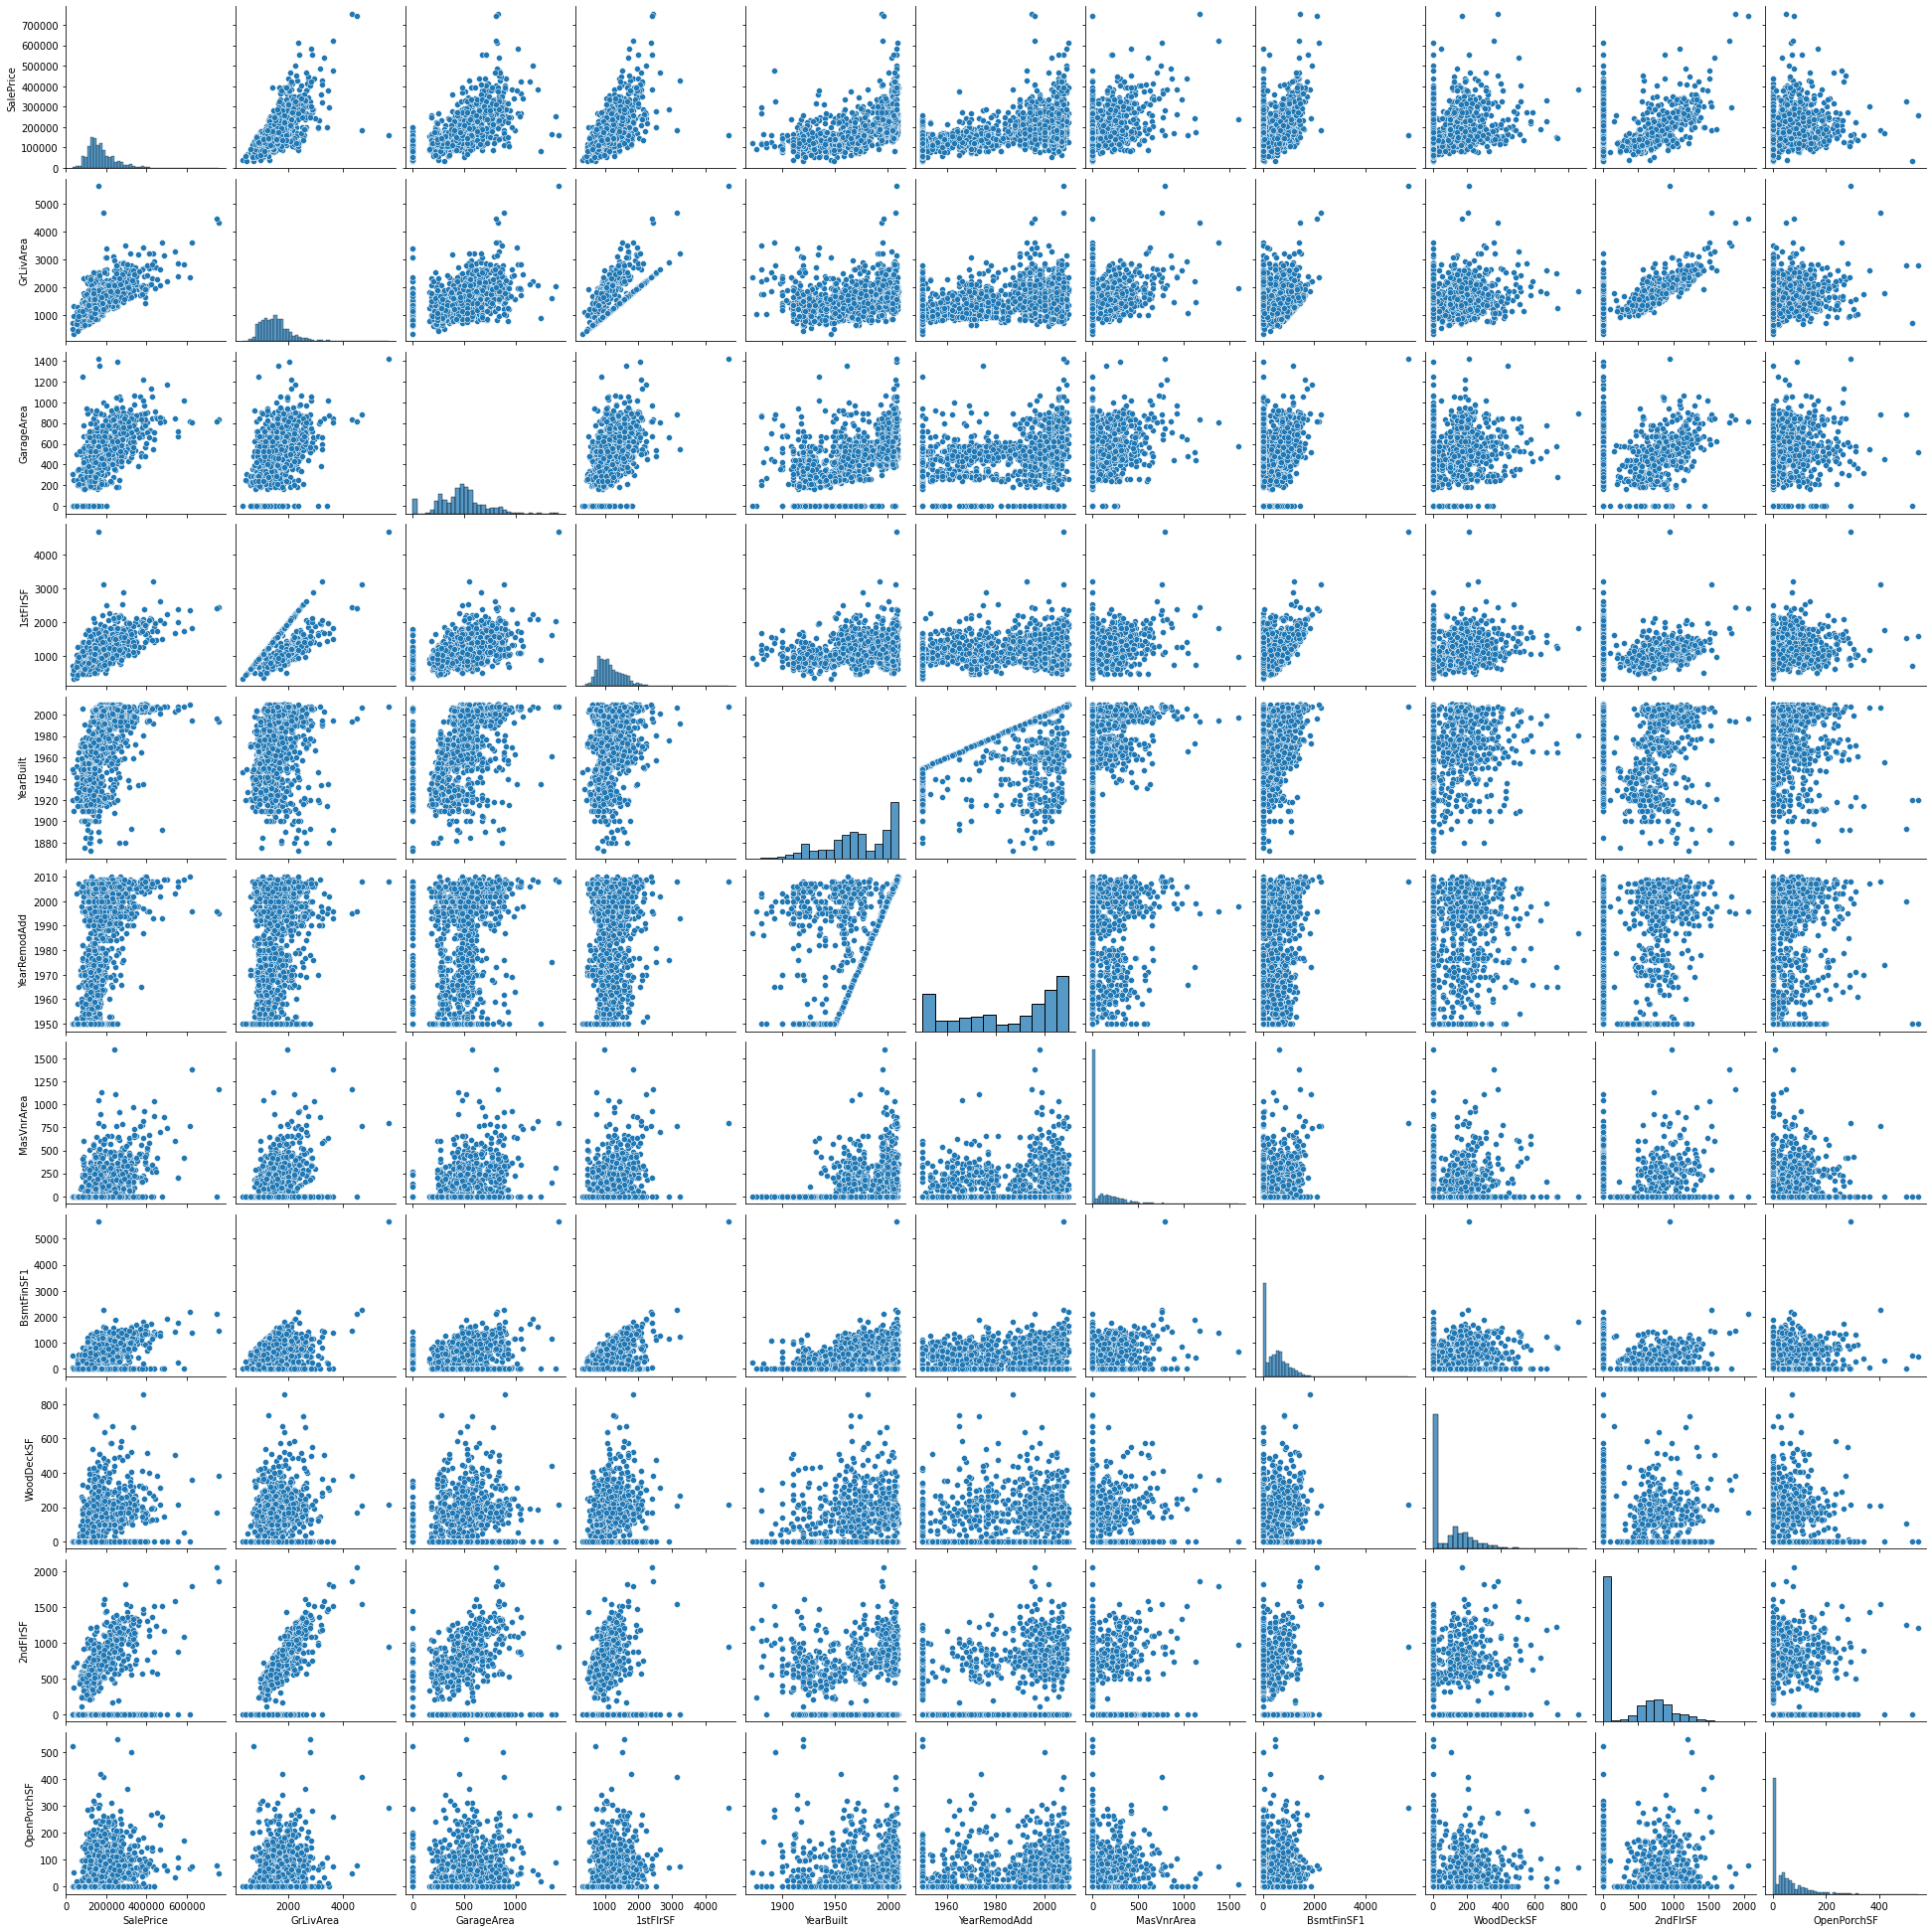

In [28]:
sns.pairplot(df[['SalePrice','GrLivArea','GarageArea',	'1stFlrSF',	'YearBuilt',
                'YearRemodAdd',	'MasVnrArea',	'BsmtFinSF1',	'WoodDeckSF',	'2ndFlrSF',	'OpenPorchSF']])
plt.show()

## 2.2 Análise sobre correlações significativas

* Verificando as correlações entre variáveis

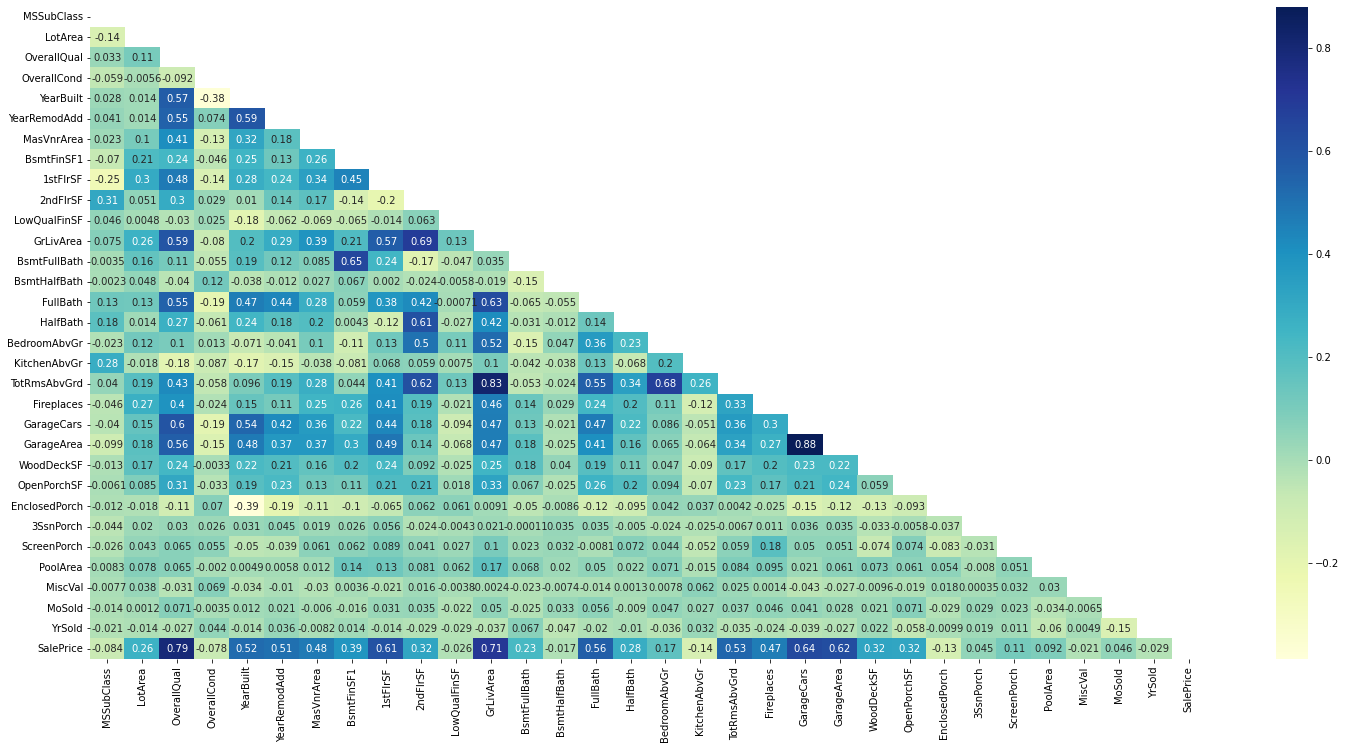

In [29]:
plt.figure(figsize=(25,12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,annot=True,mask=mask, vmax=.88,cmap="YlGnBu")
plt.show()

De acordo com a matriz de correlação, as variáveis independentes **GarageArea** com **GarageCars** e **TotRmsAbvGrd** com **GrLivArea**  possuem considerável correlações positivas.

* Verificando a correlação das variáveis com a variável target (SalePrice)

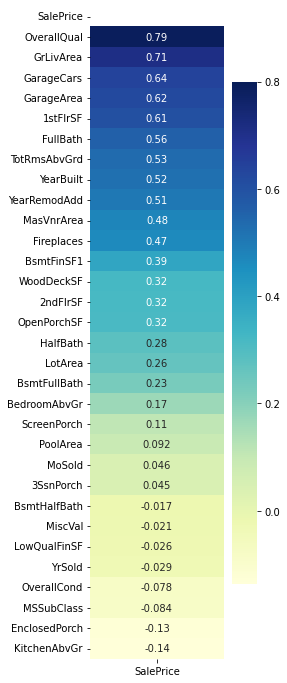

In [30]:
plt.figure(figsize=(3,12))
mask = np.triu(np.ones_like(corr[['SalePrice']].sort_values(by='SalePrice',ascending=False), dtype=np.bool))
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice',ascending=False),annot=True,mask=mask, vmax=.8,cmap="YlGnBu")
plt.show()

* Selecionando as variáveis mais bem correlacionadas com a variável target

In [31]:
Var_corr = df[['OverallQual','GrLivArea','GarageCars',	'GarageArea',	'1stFlrSF',	'FullBath',	'TotRmsAbvGrd',	'YearBuilt',
                'YearRemodAdd',	'MasVnrArea',	'Fireplaces',	'BsmtFinSF1',	'WoodDeckSF',	'2ndFlrSF',	'OpenPorchSF',	'HalfBath']]

* Preenchendo os dados ausentes

In [32]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace=True)

# 3 - Regressão Linear com o método de mínimos quadrados ordinários

* Fazendo uma cópia do dataset

In [48]:
df_X = df.copy()

* Separando a variável resposta das variáveis preditoras

In [49]:
X = df_X.drop(['SalePrice'], axis = 1)
y = df_X.SalePrice

* Criando variáveis fictícias para as variáveis categóricas

In [50]:
X = pd.get_dummies(X)

* Padronizando variáveis numéricas

In [51]:
scaler = StandardScaler()

dependent_cols = X.columns

transformed_X = scaler.fit_transform(X)
X.loc[:, dependent_cols] = transformed_X

## 3.1 Determinação do tamanho da amostra de teste

* Dividindo o conjunto de treinamento e validação

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test =  train_test_split(X,y, test_size = 0.33,random_state = 42)

## 3.2 Medidas de desempenho para amostra de treino e para amostra de teste


**Métricas de regressão:**


*  Coeficiente de determinação -  *R-squared*;
* A soma residual dos quadrados - *Residual sum of squares (RSS)*.
*  O erro padrão residual: raiz quadrada de (RSS / graus de liberdade)  - *Residual standard error (RSE)*



## 3.3 Descrição do modelo final, discussão sobre a significância obtida para os coeficientes, análise de resíduos.

* Carregando bibliotecas necessárias

In [53]:
import pandas.util.testing as tm
import statsmodels.api as sm

* Ajustando o modelo

In [54]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

* Resumo

In [55]:
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     82.00
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        06:54:53   Log-Likelihood:                -11454.
No. Observations:                 978   AIC:                         2.304e+04
Df Residuals:                     914   BIC:                         2.335e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.798e+05 

* Coeficiente de determinação:


In [56]:
print('R-squared:', model.rsquared.round(3))

R-squared: 0.85



*  O erro padrão residual (RSE)
   

In [57]:
rss = sum(model.resid**2) 
print('RSE:', np.sqrt( rss / (model.nobs-2) ) )

RSE: 29550.32767209806


* Testando a capacidade de generalização do modelo

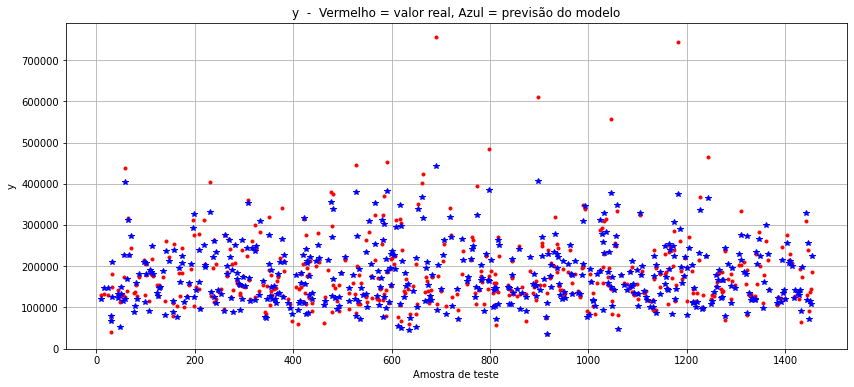

In [58]:
plt.subplots(figsize=(14,6))
plt.plot(y_test,'r.')
plt.plot(model.predict(sm.add_constant(X_test)),'b*')
plt.xlabel('Amostra de teste')
plt.ylabel('y')
plt.title('y  -  Vermelho = valor real, Azul = previsão do modelo')
plt.grid(True)
plt.show()

### Significância obtida para os coeficientes

* Estatísticas dos coeficientes:

*Obs: Na tabela de saída do modelo, model.summary(), cada coeficiente possui seu teste t de significância individual. Usaremos esses testes para determinar se a variável independente é realmente importante para o modelo.*

*Para valores de p-value < 0,05 a hipótese nula é rejeitada e podemos manter a variável no modelo.*


* Coeficientes significativos:

In [59]:
model.pvalues[model.pvalues <0.05]

const                   0.000000e+00
MSSubClass              1.900185e-11
LotArea                 1.149526e-06
OverallQual             5.778577e-21
OverallCond             3.235326e-04
YearBuilt               6.991452e-05
YearRemodAdd            3.721592e-02
BsmtFinSF1              1.625526e-02
1stFlrSF                9.951859e-06
2ndFlrSF                1.493823e-03
LowQualFinSF            3.738490e-02
GrLivArea               3.670012e-08
BsmtFullBath            5.951501e-06
FullBath                1.449417e-02
BedroomAbvGr            4.066303e-03
TotRmsAbvGrd            3.100948e-06
Fireplaces              2.481567e-03
GarageCars              1.146622e-04
WoodDeckSF              5.600074e-03
3SsnPorch               4.911548e-02
ScreenPorch             5.803239e-06
PoolArea                3.248850e-04
LotShape_IR3            8.982429e-03
Neighborhood_Crawfor    4.769558e-04
Neighborhood_Edwards    2.159563e-03
Neighborhood_Gilbert    1.882567e-02
Neighborhood_Mitchel    4.712108e-02
N

### Análise de resíduos

* Checando a média e desvio padrão do resíduo:

In [60]:
print('mean resid:', round(model.resid.mean(),3))
print('std resid:', round(model.resid.std(),3))

mean resid: -0.0
std resid: 29535.201


* Normalidade do resíduo

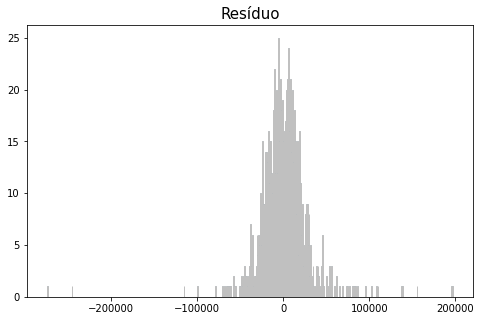

In [61]:
plt.figure(figsize=(8,5))
plt.hist(model.resid,bins=500,edgecolor='silver')
plt.title("Resíduo",fontsize=15)
plt.show()

Notemos que a distribuição se aproxima da distribuição normal.

### Testes para confirmar a distribuição normal vistos em model.summary().

In [62]:
from scipy.stats import kurtosis,skew,normaltest,jarque_bera

* Skewness: assimetria da distribuição.

In [63]:
print('skew:', round(skew(model.resid),3))

skew: -0.207


Como skew tem valor negativo existe uma assimetria negativa. 

 * A curtose da distribuição.

*Obs: A curtose está associada ao achatamento da distribuição. A curtose de uma distribuição normal é 3.*

In [64]:
print('kurtosis:', round(kurtosis(model.resid, fisher=False),3))

kurtosis: 20.994


  Como o valor é > 3 a distribuição é mais “alta” que a distribuição normal. 

* Teste Jarque-Bera e normaltest: ambos os testes tem como hipótese nula a normalidade.


*Obs: Para valores de p < 0,05 a normalidade é rejeitada.*

In [65]:
print('jarque bera test:', round(jarque_bera(model.resid)[0],3))
print('p-value jarque bera:', jarque_bera(model.resid)[1])

jarque bera test: 13200.599
p-value jarque bera: 0.0


In [66]:
print('normaltest:', round(normaltest(model.resid)[0],3))
print('p-value normaltest:', round(normaltest(model.resid)[1],3))

normaltest: 251.25
p-value normaltest: 0.0


 Sendo assim, como temos valores de p-valor < 0,05 a normalidade é rejeitada.

Observamos que tanto o gráfico de distribuição do resíduo como os testes acima não confirmam a teoria de normalidade. Diante disso, podemos concluir que temos uma distribuição próxima a normal, mas não exatamente.

### Removendo variáveis pelo p-valor

* Obtendo um modelo apenas com coeficientes significativos:

In [67]:
variables = X_train.columns
target = y_train
pvalue_limit_number = 0.05

while len(variables) > 0:
  y = y_train
  x = X_train[variables]
  x = sm.add_constant(x)
  model_sm = sm.OLS(y, x).fit()
  var_model = model_sm.pvalues.drop('const', axis=0)
  df_pvalue = pd.DataFrame(var_model, columns=['valor'])
  pvalue_max = df_pvalue.loc[df_pvalue.valor > pvalue_limit_number]
  var_max = pvalue_max.index
  if len(var_max) > 0:
    variables = variables.drop(var_max)
  else:
    break

In [68]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.4
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        06:54:56   Log-Likelihood:                -11486.
No. Observations:                 978   AIC:                         2.302e+04
Df Residuals:                     952   BIC:                         2.315e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.799e+05 

Agora temos um modelo com todos os coeficientes significativos. 

* Coeficiente de determinação:


In [69]:
print('R-squared:', model_sm.rsquared.round(3))

R-squared: 0.84



*  O erro padrão residual (RSE)
   

In [70]:
rss = sum(model_sm.resid**2) 
print('RSE:', np.sqrt( rss / (model_sm.nobs-2) ) )

RSE: 30521.577886377047


* Checando a presença de multicolinearidade no modelo

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#vif - multicolinearidade
vif = [variance_inflation_factor(X_train[variables].values, i) for i in range(X_train[variables].shape[1])]
vif_df = pd.DataFrame({'vif': vif[1:]}, index=X_train[variables].columns.drop('const'))
vif_df[vif_df['vif']>10]

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif
1stFlrSF,inf
2ndFlrSF,inf
LowQualFinSF,inf
GrLivArea,inf


Notemos que alguumas variáveis possuem  valores  VIF > 10 e, portanto, há multicolinearidade entre as variéveis independentes presentes no modelo. 

In [72]:
#removendo as variáveis 
var_x = variables.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea'])

In [73]:
y = y_train
x = X_train[var_x]

model_sm_1 = sm.OLS(y,x).fit()
print(model_sm_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     211.8
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        06:54:56   Log-Likelihood:                -11515.
No. Observations:                 978   AIC:                         2.308e+04
Df Residuals:                     955   BIC:                         2.319e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.799e+05 

* Coeficiente de determinação:


In [74]:
print('R-squared:', model_sm_1.rsquared.round(3))

R-squared: 0.83



*  O erro padrão residual (RSE)
   

In [75]:
rss = sum(model_sm_1.resid**2) 
print('RSE:', np.sqrt( rss / (model_sm.nobs-2) ) )

RSE: 31435.30632039365


Conclusão do modelo com apenas os coeficientes significativos:  

*   O coeficiente de determinação $R^2$ é menor;
*    Erro padrão residual é maior.



# Outros modelos

* Carregando alguns pacotes Python necessários

In [76]:
import datetime
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

* Separando a variável resposta das variáveis preditoras

In [77]:
X = df_X.drop(['SalePrice'], axis = 1)
y = df_X.SalePrice

* Criando variáveis fictícias para as variáveis categóricas

In [78]:
X = pd.get_dummies(X)

* Padronizando variáveis numéricas

In [79]:
scaler = StandardScaler()

dependent_cols = X.columns

transformed_X = scaler.fit_transform(X)
X.loc[:, dependent_cols] = transformed_X

* Dividindo o conjunto de treinamento e validação

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test =  train_test_split(X,y, test_size = 0.33,random_state = 42)

### Treinando os medelos

In [81]:
execution_results = []

score_model = [] # Acurácia
MSE = [] # Erro quadrático médio
measured_time_train = []
# Definindo os modelos:
models = [
    [LinearRegression(), {}, [Normalizer()]],
    [RandomForestRegressor(random_state = 8), {}, [Normalizer()]],
    [GradientBoostingRegressor(random_state = 8), {}, [Normalizer()]],
]

best_score = 9999999999999
best_clf = None

def loss_func(y_true, y_predicted):
    return mean_squared_error(y_true, y_predicted, squared=False)

score = make_scorer(loss_func, greater_is_better=False)

for classifier in models:
    print("Training {}...".format(type(classifier[0]).__name__))
    begin_time = datetime.datetime.now()

    clf=classifier[0].fit(X_train, y_train) 
    msd_time_train = datetime.datetime.now() - begin_time
    measured_time_train.append(format(msd_time_train))
    # Prever com o conjunto de teste e rótulos
    begin_time = datetime.datetime.now()
    y_pred = clf.predict(X_test)
    # Calculando o tempo decorrido 
    measured_time_test = datetime.datetime.now() - begin_time
    # Calculando erro quadrático médio 
    error = mean_squared_error(y_test, y_pred, squared=False)
    MSE.append(error)
    # Calculando a acurácia
    from sklearn.metrics import r2_score
    score = r2_score(y_test, y_pred)
    score_model.append(score)
    if error < best_score:
        best_score = error
        best_clf = clf

Training LinearRegression...
Training RandomForestRegressor...
Training GradientBoostingRegressor...


### Resultados dos modelos

In [82]:
md = pd.DataFrame({'modelos': models,
                   'mse': MSE,
                   'score':score_model,
                   'tempo decorrido de treinamento':measured_time_train})
md.sort_values(['mse', 'score'])

,modelos,mse,score,tempo decorrido de treinamento
1,"[(DecisionTreeRegressor(ccp_alpha=0.0, criteri...",31615.600001,0.863848,0:00:01.119180
2,"[([DecisionTreeRegressor(ccp_alpha=0.0, criter...",31893.236381,0.861446,0:00:00.369159
0,"[LinearRegression(copy_X=True, fit_intercept=T...",35973.331870,0.823728,0:00:00.038699


In [83]:
print("A melhor pontuação foi {} por clf {}".format(best_score, str(best_clf)))

A melhor pontuação foi 31615.60000102041 por clf RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=8, verbose=0, warm_start=False)


* Testando a capacidade de generalizaçãodo modelo

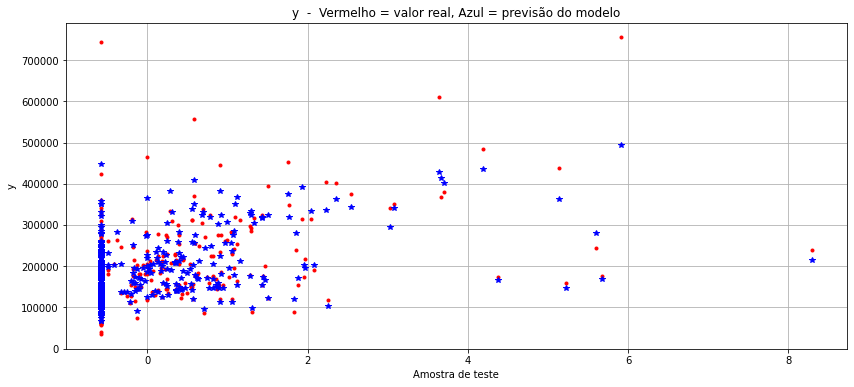

In [84]:
plt.subplots(figsize=(14,6))
plt.plot(X_test.iloc[:,6],y_test,'r.')
plt.plot(X_test.iloc[:,6],best_clf.predict(X_test),'b*')
plt.xlabel('Amostra de teste')
plt.ylabel('y')
plt.title('y  -  Vermelho = valor real, Azul = previsão do modelo')
plt.grid(True)
plt.show()